# NYC311 Customer Service Analysis
# Exploratory Data Analysis and OLS Regression

In [1]:
#######################################################################################################
# Load the required libraries
#######################################################################################################
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#######################################################################################################
# Load file with NYC Customer service data
#######################################################################################################
NYC = pd.read_csv('./datasets/311_Service_Requests_from_2010_to_Present.csv')

In [5]:
#######################################################################################################
# look at the structure of the file loaded for null values, datatypes, number of rows/columns etc
#######################################################################################################
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
#######################################################################################################
# drop all the columns with no data or/and with many null values
#######################################################################################################
NYC = NYC.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location',\
                'Garage Lot Name','Ferry Direction','Ferry Terminal Name','Bridge Highway Name','Bridge Highway Direction',\
                'Road Ramp','Bridge Highway Segment','Landmark','School Name','School Number','School Region','School Code',\
                'School Phone Number','School Address','School City','School State','School Zip','School Not Found', \
                'Intersection Street 1','Intersection Street 2','Incident Address','Street Name','Cross Street 1',
                'Cross Street 2','X Coordinate (State Plane)','Y Coordinate (State Plane)'],  axis=1)

In [7]:
import gc
gc.collect()

44

In [8]:
#######################################################################################################
# check the file structher again to see how many rows/columns remaining
#######################################################################################################
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Address Type                    297883 non-null  object 
 10  City                            298084 non-null  object 
 11  Facility Type                   298527 non-null  object 
 12  Status          

In [9]:
#######################################################################################################
# look at the top file records of first 12 columns
#######################################################################################################
NYC.iloc[:,0:12].head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct


In [10]:
#######################################################################################################
# look at the top 5 records of the columns from 12 thru remaining
#######################################################################################################
NYC.iloc[:,12:24].head()

,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Park Facility Name,Park Borough,Latitude,Longitude,Location
0,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [11]:
#######################################################################################################
# heck the shape of the file again 
#######################################################################################################
x=NYC.shape[0]
NYC.shape

(300698, 23)

In [12]:
#######################################################################################################
# Look at the data in status variable and find out how many has been closed/open etc
#######################################################################################################
NYC.Status.value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [13]:
#######################################################################################################
# drop rows that have null values in closed and created date fileds
#######################################################################################################
NYC = NYC[~NYC['Created Date'].isna()]
NYC = NYC[~NYC['Closed Date'].isna()]


In [14]:
#######################################################################################################
# Look at the shape of the file after removing null values from closed date field
#######################################################################################################
NYC.shape

(298534, 23)

In [15]:
#######################################################################################################
# Calculate the unresolved complaints in the files 
#######################################################################################################
com_unresolved = x- NYC.shape[0]
com_unresolved

2164

# Observation: 2164 complaints have not been closed/resolved 
# for whatever reason

In [16]:
#######################################################################################################
# Remove rows if there are any null values in Due date field
#######################################################################################################
NYC = NYC[~NYC['Due Date'].isna()]

In [17]:
#######################################################################################################
# Covert the date objects into datetime fields
#######################################################################################################
NYC['Created Date'] = pd.to_datetime(NYC['Created Date'],infer_datetime_format=True)
NYC['Closed Date'] = pd.to_datetime(NYC['Closed Date'],infer_datetime_format=True)
NYC['Due Date'] = pd.to_datetime(NYC['Due Date'],infer_datetime_format=True)

In [18]:
#######################################################################################################
# populate 00000 in the Incident Zip field and convert it from float to integer
#######################################################################################################
NYC['Incident Zip'] = NYC['Incident Zip'].fillna(0)
NYC['Incident Zip'] = NYC['Incident Zip'].astype(int)

In [19]:
#######################################################################################################
# define a function to calculate the Request closing time in days and populate in a new field
#######################################################################################################
def Request_Closing_Time(row):
    timeDelta = (row['Closed Date'] - row['Created Date'])
    return (timeDelta.days)

NYC['Request_Closing_Time'] = NYC.apply(lambda row: Request_Closing_Time(row),axis=1)

In [20]:
#######################################################################################################
# define a function to calculate the days difference in due date and actual closed date
#######################################################################################################
def Request_Closing_before_due_date(row):
    timeDelta = (row['Due Date'] - row['Closed Date'])
    return (timeDelta.days)

NYC['Request_Closing_before_due_date'] = NYC.apply(lambda row: Request_Closing_before_due_date(row),axis=1)

In [21]:
#######################################################################################################
# See the data in the newly created filed
#######################################################################################################
NYC['Request_Closing_before_due_date']

0         0
1         0
2         0
3         0
4         0
         ..
300692    0
300694    0
300695    0
300696    0
300697    0
Name: Request_Closing_before_due_date, Length: 298533, dtype: int64

# Observation: All requests have been resolved within due day

In [22]:
#######################################################################################################
# check how many requests have been closed within a day, 2days and so on
#######################################################################################################
NYC['Request_Closing_Time'].value_counts()   

0     294850
1       3030
2        442
3        123
5         34
4         30
6         14
8          3
9          2
24         2
21         1
7          1
14         1
Name: Request_Closing_Time, dtype: int64

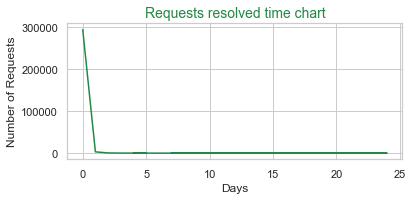

In [23]:
#######################################################################################################
# plot the graph of request resolved in days 
#######################################################################################################
plt.figure(figsize=(6,2.5))
plt.plot(NYC['Request_Closing_Time'].value_counts(),color='#228844')
plt.ylabel('Number of Requests')
plt.xlabel('Days')
fontdict={'fontsize':14,'color':'#228844'}
plt.title('Requests resolved time chart',fontdict=fontdict)
plt.grid(True)
plt.show()

# Observation: Majority of complaints are closed within a day

In [24]:
#######################################################################################################
# Look at the data in complaint/Request type filed and count them by type
#######################################################################################################
NYC_comp_type = pd.DataFrame(NYC['Complaint Type'].value_counts())

In [25]:
#######################################################################################################
# Look at the top 5 complaint types
#######################################################################################################
NYC_comp_type.head()

,Complaint Type
Blocked Driveway,76809
Illegal Parking,74532
Noise - Street/Sidewalk,48076
Noise - Commercial,35247
Derelict Vehicle,17588


In [26]:
#######################################################################################################
# Look at the bottom 5 complaint types
#######################################################################################################
NYC_comp_type.tail()

,Complaint Type
Illegal Fireworks,168
Graffiti,113
Agency Issues,6
Squeegee,4
Animal in a Park,1


# Observation: 
# Top 5 complaints are Blocked Driveway, Illegal Parking, Noise - 
# Street/Sidewalk, Noise - Commercial and Derelict Vehicle

# Bottom 5 complaints are Animal in a Park, Squeegee, Graffiti, Illegal 
# Fireworks, Disorderly Youth and Panhandling


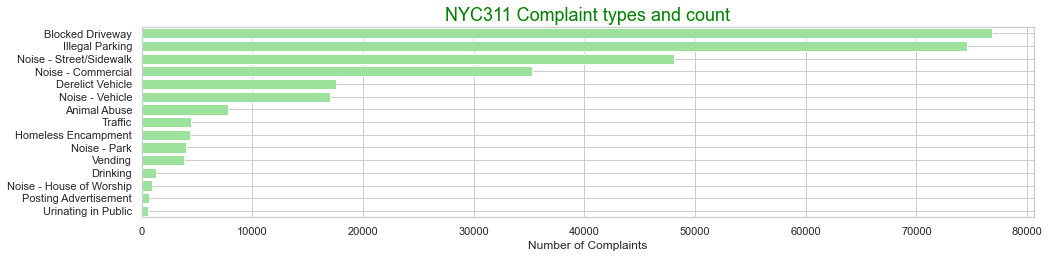

In [27]:
#######################################################################################################
# plot the chart of complaint types and their counts in decreasing order
#######################################################################################################
plt.figure(figsize=(16,3.5))
sns.barplot(data=NYC_comp_type.head(15),x=NYC_comp_type['Complaint Type'].head(15),\
            y=NYC_comp_type.index[0:15],orient='h',color='lightgreen') 
plt.xlabel('Number of Complaints')
fontdict={'fontsize':18,'color':'green'}
plt.title('NYC311 Complaint types and count',fontdict=fontdict)
plt.grid(True)
plt.show()

In [28]:
#######################################################################################################
# remove rows that has Unspecified data in the Borough field
#######################################################################################################
NYC = NYC[NYC['Borough']!='Unspecified']

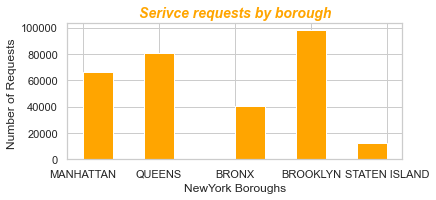

In [29]:
#######################################################################################################
# plot the data in Borough field to shaow how the data is being distributed
#######################################################################################################
plt.figure(figsize=(6,2.5))
NYC.Borough.hist(color='orange')
fontdict={'fontsize':14,'color':'orange','fontstyle':'italic','fontweight':'bold'}
plt.title('Serivce requests by borough',fontdict=fontdict)
plt.xlabel('NewYork Boroughs')
plt.ylabel('Number of Requests ')
plt.grid(True)
plt.show()


# Brooklyn lodged the highest complaints,while Staten island 
# lodged the least complaints

# Conclusion: Requests and Borough are related as some made more
# compared to others

In [30]:
#######################################################################################################
# Look at the data in City field to see how the data is distributed and list the top 5 cities
#######################################################################################################
NYC.City.value_counts().head()


BROOKLYN         98294
NEW YORK         65972
BRONX            40697
STATEN ISLAND    12338
JAMAICA           7294
Name: City, dtype: int64

# Top 5 cities with highest complaints

In [31]:
#######################################################################################################
# List the bottom 5 cities with least complaints
#######################################################################################################
NYC.City.value_counts().tail()


CENTRAL PARK     97
QUEENS           31
BREEZY POINT     30
East Elmhurst    14
Howard Beach      1
Name: City, dtype: int64

# Bottom 5 cities with least complaints

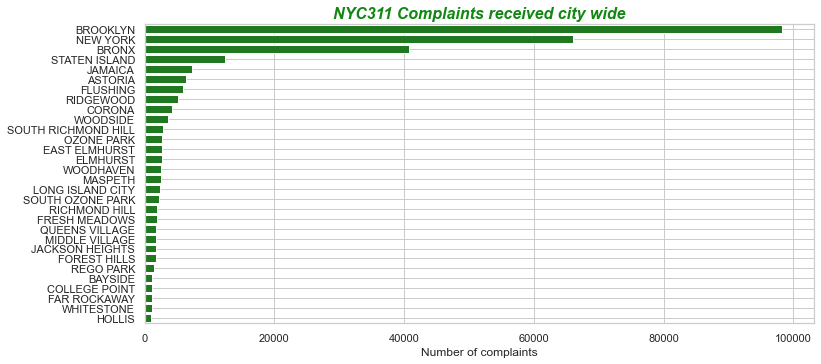

In [32]:
#######################################################################################################
# plot the graph of NYC311 Complaints received city wide
#######################################################################################################
NYC_city = pd.DataFrame(NYC.City.value_counts())

plt.figure(figsize=(12,5.5))
sns.barplot(data=NYC_city.head(30),x=NYC_city['City'].head(30),y=NYC_city.index[0:30],orient='h',color='#118811') 
plt.xlabel('Number of complaints')
fontdict={'fontsize':16,'color':'#118811','fontstyle':'italic','fontweight':'bold'}
plt.title('NYC311 Complaints received city wide',fontdict=fontdict)
plt.grid(True)
plt.show()

# Conclusion: Service Requested and City are related as some 
# requested majority while other cities requested very few

In [33]:
#######################################################################################################
# extract data for complaint type and resolved time
#######################################################################################################
NYC_Comp_type = NYC[['Complaint Type','Request_Closing_Time','Request_Closing_before_due_date']]

In [34]:
#######################################################################################################
# group and sort the data by complaint type and the days it is resolved and its count
#######################################################################################################
NYC_Comp_type.rename(columns={'Request_Closing_before_due_date':'Number of Complaints'},inplace=True)
NYC_Comp_type.rename(columns={'Request_Closing_Time':'Average_closing_in_Days'},inplace=True)
NYC_Comp_type=NYC_Comp_type.groupby(by=['Complaint Type','Average_closing_in_Days']).count()
NYC_Comp_type = NYC_Comp_type.sort_values(by='Number of Complaints',ascending=False)

In [35]:
#######################################################################################################
# List the top 10 complaint types and the days it took to resolve
#######################################################################################################
NYC_Comp_type.head(10)

,,Number of Complaints
Complaint Type,Average_closing_in_Days,
Blocked Driveway,0,75818
Illegal Parking,0,73448
Noise - Street/Sidewalk,0,47683
Noise - Commercial,0,35006
Noise - Vehicle,0,16902
Derelict Vehicle,0,16633
Animal Abuse,0,7629
Traffic,0,4455
Homeless Encampment,0,4380


# Majority of requests came with issues related to Blocked driveway
# Illegal parking and Noise related. And majority have been solved
# within a day

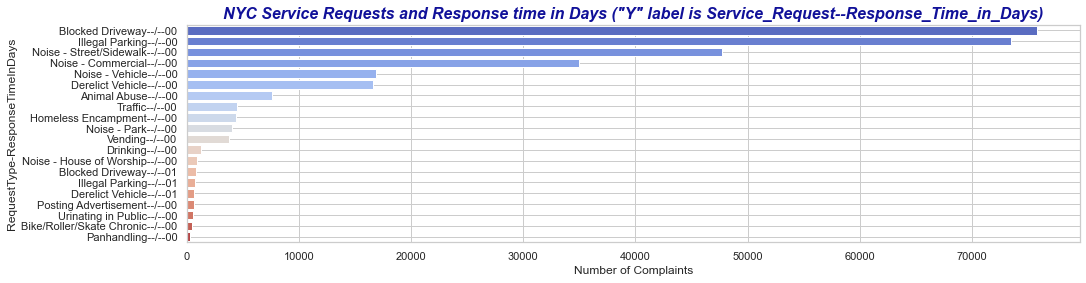

In [36]:
#######################################################################################################
# plot the garph of complaint type, count and the days they are resolved
#######################################################################################################
plt.figure(figsize=(16,4))
NYC_Comp_type['RequestType-ResponseTimeInDays'] = NYC_Comp_type.index.get_level_values(0).astype(str) + '--/--' + \
                   NYC_Comp_type.index.get_level_values(1).astype(str).str.zfill(2)
sns.barplot(data=NYC_Comp_type.head(20),y=NYC_Comp_type['RequestType-ResponseTimeInDays'].head(20),\
            x=NYC_Comp_type['Number of Complaints'].head(20), \
            palette='coolwarm',orient='h')
fontdict={'fontsize':16,'fontstyle':'italic','fontweight':'bold','color':'#111199'}
plt.title('NYC Service Requests and Response time in Days ("Y" label is Service_Request--Response_Time_in_Days)',fontdict=fontdict)
plt.grid(True)
plt.show()


In [37]:
#######################################################################################################
# extract the data of complaints groupby borough and average resolved time 
#######################################################################################################
NYC_Comp_type_Borough_Rtime = NYC[['Complaint Type','Borough','Request_Closing_Time','Request_Closing_before_due_date']]
NYC_Comp_type_Borough_Rtime.rename(columns={'Request_Closing_before_due_date':'Number of Complaints'},inplace=True)
NYC_Comp_type_Borough_Rtime.rename(columns={'Request_Closing_Time':'Averge_closing_in_Days'},inplace=True)
NYC_Comp_type_Borough_Rtime=NYC_Comp_type_Borough_Rtime.groupby(by=['Complaint Type','Borough','Averge_closing_in_Days']).count()
NYC_Comp_type_Borough_Rtime = NYC_Comp_type_Borough_Rtime.sort_values(by='Number of Complaints',ascending=False)

In [38]:
#######################################################################################################
# List the top 10 complaint types/broughs and the average days they took to resolve
#######################################################################################################
NYC_Comp_type_Borough_Rtime.head(10)

Number of Complaints
Complaint Type          Borough   Averge_closing_in_Days                      
Blocked Driveway        QUEENS    0                                      31295
                        BROOKLYN  0                                      27919
Illegal Parking         BROOKLYN  0                                      27229
                        QUEENS    0                                      21612
Noise - Street/Sidewalk MANHATTAN 0                                      20474
Noise - Commercial      MANHATTAN 0                                      14479
Noise - Street/Sidewalk BROOKLYN  0                                      13309
Blocked Driveway        BRONX     0                                      12397
Illegal Parking         MANHATTAN 0                                      12094
Noise - Commercial      BROOKLYN  0                                      11432

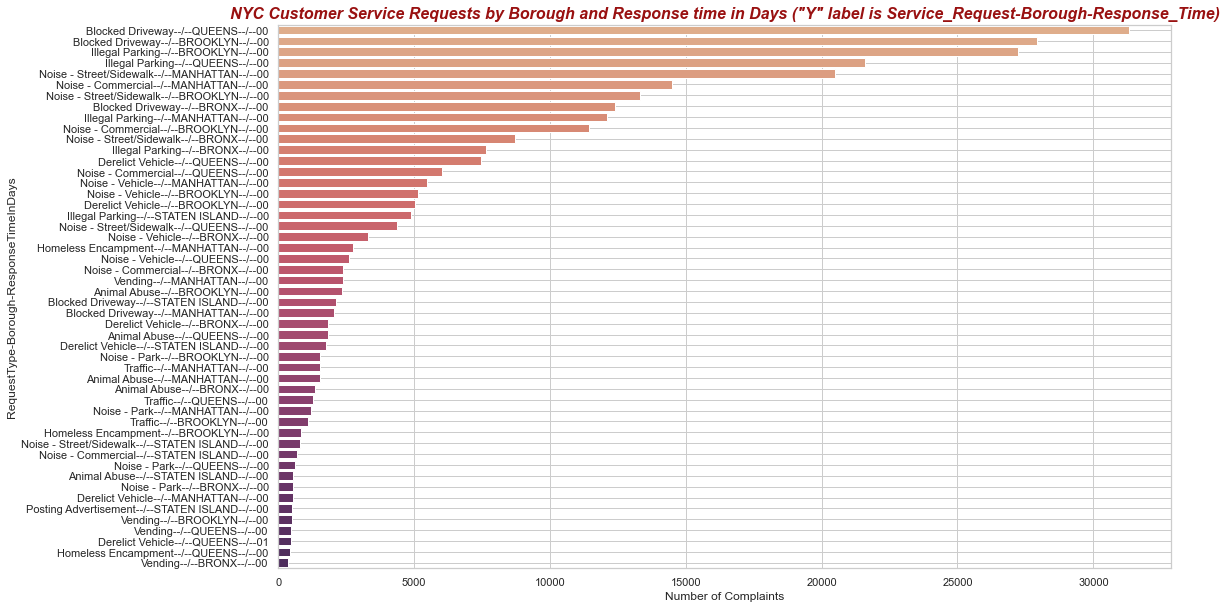

In [39]:
#######################################################################################################
# plot the graph of complaint types/borough/and the time it took to resolve and their count
#######################################################################################################
plt.figure(figsize=(16,10))
NYC_Comp_type_Borough_Rtime['RequestType-Borough-ResponseTimeInDays'] = \
                   NYC_Comp_type_Borough_Rtime.index.get_level_values(0).astype(str) + '--/--' + \
                   NYC_Comp_type_Borough_Rtime.index.get_level_values(1).astype(str) + '--/--' + \
                   NYC_Comp_type_Borough_Rtime.index.get_level_values(2).astype(str).str.zfill(2)

sns.barplot(data=NYC_Comp_type_Borough_Rtime.head(50),\
            y=NYC_Comp_type_Borough_Rtime['RequestType-Borough-ResponseTimeInDays'].head(50),\
            x=NYC_Comp_type_Borough_Rtime['Number of Complaints'].head(50), \
            palette='flare',orient='h')
fontdict={'fontsize':16,'fontweight':'bold','color':'#991111','fontstyle':'italic'}
plt.title('NYC Customer Service Requests by Borough and Response time in Days \
("Y" label is Service_Request-Borough-Response_Time)',fontdict=fontdict)
plt.grid(True)
plt.show()


# Majority of requests have been resolved within a day across 
# all boroughs and across all request types

# Conclusion: Average response time across complaint types is similar

In [40]:
#######################################################################################################
# extract the data of complaint types ny boruogh wise
#######################################################################################################
NYC_Comp_type_byBorough = NYC[['Complaint Type','Borough','Request_Closing_before_due_date']]
NYC_Comp_type_byBorough.rename(columns={'Request_Closing_before_due_date':'Number of Complaints'},inplace=True)
NYC_Comp_type_byBorough=NYC_Comp_type_byBorough.groupby(by=['Complaint Type','Borough']).count()
NYC_Comp_type_byBorough = NYC_Comp_type_byBorough.sort_values(by='Number of Complaints',ascending=False)

In [41]:
#######################################################################################################
# List the top 15 complaint types/borough and the count
#######################################################################################################
NYC_Comp_type_byBorough.head(15)

Number of Complaints
Complaint Type          Borough                        
Blocked Driveway        QUEENS                    31639
                        BROOKLYN                  28146
Illegal Parking         BROOKLYN                  27461
                        QUEENS                    21979
Noise - Street/Sidewalk MANHATTAN                 20543
Noise - Commercial      MANHATTAN                 14554
Noise - Street/Sidewalk BROOKLYN                  13353
Blocked Driveway        BRONX                     12754
Illegal Parking         MANHATTAN                 12129
Noise - Commercial      BROOKLYN                  11458
Noise - Street/Sidewalk BRONX                      8889
Derelict Vehicle        QUEENS                     8108
Illegal Parking         BRONX                      7859
Noise - Commercial      QUEENS                     6073
Noise - Vehicle         MANHATTAN                  5484

# Requests for major issues came evenly from all 4 out of 5 boroughs except 
# Staten island

# Conclusion: Complaint or Service requested and location related as Staten
# Island does not appear any where in the top 15

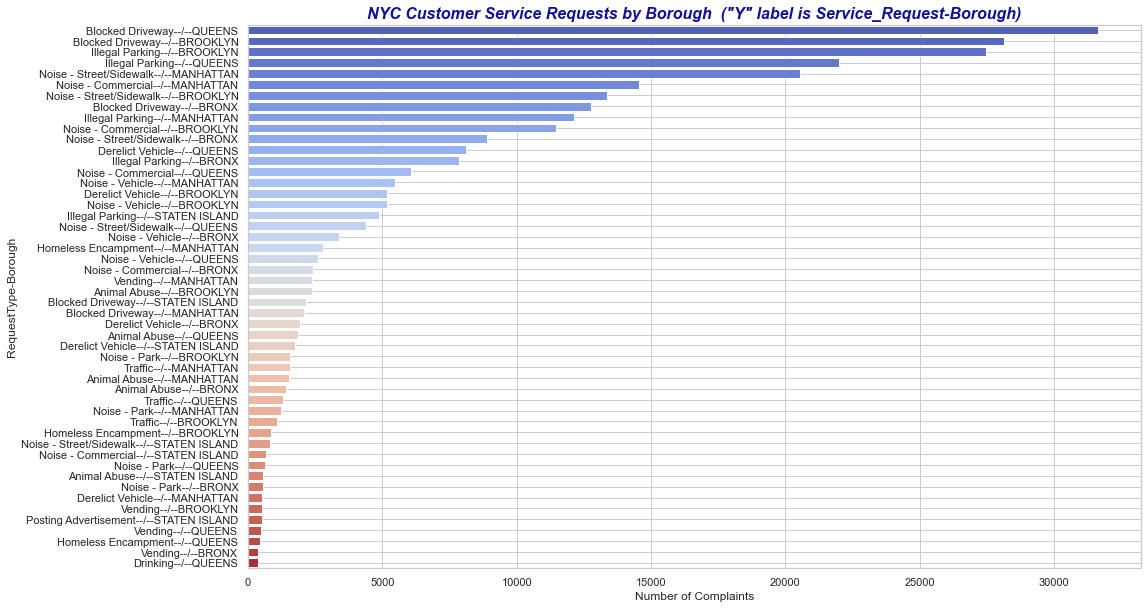

In [42]:
#######################################################################################################
# plot the graph of compalint type/borough and the count
#######################################################################################################
plt.figure(figsize=(16,10))
NYC_Comp_type_byBorough['RequestType-Borough'] = NYC_Comp_type_byBorough.index.get_level_values(0).astype(str) + '--/--' + \
                   NYC_Comp_type_byBorough.index.get_level_values(1).astype(str).str.zfill(1)

sns.barplot(data=NYC_Comp_type_byBorough.head(50),y=NYC_Comp_type_byBorough['RequestType-Borough'].head(50),\
            x=NYC_Comp_type_byBorough['Number of Complaints'].head(50), \
            palette='coolwarm',orient='h')
fontdict={'fontsize':16,'fontweight':'bold','color':'#111199','fontstyle':'italic'}
plt.title('NYC Customer Service Requests by Borough  ("Y" label is Service_Request-Borough)',fontdict=fontdict)
plt.grid(True)
plt.show()


In [43]:
#######################################################################################################
# Extract the complaint type data by Location field and their count
#######################################################################################################
NYC_Comp_type_Loc = NYC[['Complaint Type','Location Type','Request_Closing_before_due_date']]
NYC_Comp_type_Loc.rename(columns={'Request_Closing_before_due_date':'Number of Complaints'},inplace=True)
#NYC_Comp_type_Zip.rename(columns={'Request_Closing_Time':'Averge_closing_in_Days'},inplace=True)
NYC_Comp_type_Loc=NYC_Comp_type_Loc.groupby(by=['Complaint Type','Location Type']).count()
NYC_Comp_type_Loc = NYC_Comp_type_Loc.sort_values(by='Number of Complaints',ascending=False)

In [44]:
#######################################################################################################
# Load the required libraries
#######################################################################################################
NYC_Comp_type_Loc.head(10)

,,Number of Complaints
Complaint Type,Location Type,
Blocked Driveway,Street/Sidewalk,76716
Illegal Parking,Street/Sidewalk,74279
Noise - Street/Sidewalk,Street/Sidewalk,48000
Noise - Commercial,Store/Commercial,18362
Derelict Vehicle,Street/Sidewalk,17439
Noise - Vehicle,Street/Sidewalk,17024
Noise - Commercial,Club/Bar/Restaurant,16829
Animal Abuse,Residential Building/House,5081
Traffic,Street/Sidewalk,4276


# Large number of requests came for issues related to Street/Sidewalk

# Conclusion: Requests and LocationType are related 

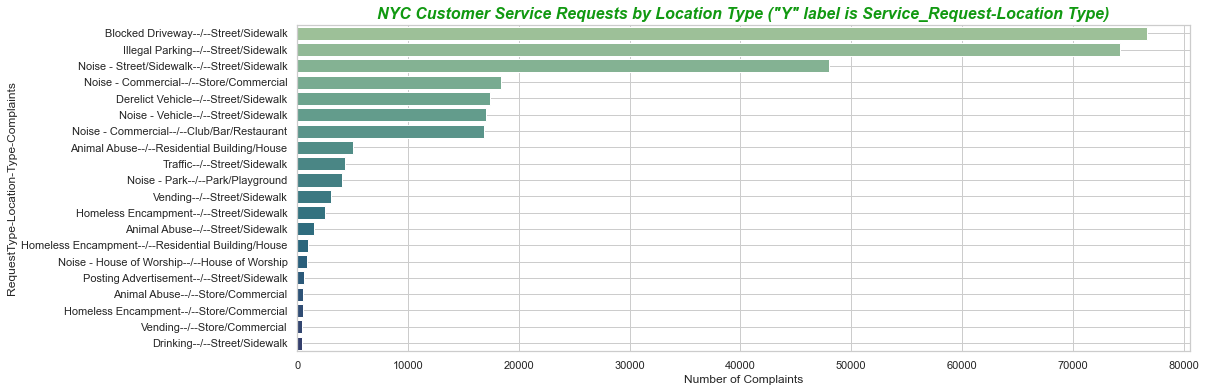

In [45]:
#######################################################################################################
# plot the graph of complaint types/location type and their count
#######################################################################################################
plt.figure(figsize=(16,6))
NYC_Comp_type_Loc['RequestType-Location-Type-Complaints'] = NYC_Comp_type_Loc.index.get_level_values(0).astype(str) + '--/--' + \
                   NYC_Comp_type_Loc.index.get_level_values(1).astype(str).str.zfill(2)



sns.barplot(data=NYC_Comp_type_Loc.head(20),y=NYC_Comp_type_Loc['RequestType-Location-Type-Complaints'].head(20),\
            x=NYC_Comp_type_Loc['Number of Complaints'].head(20), \
            palette='crest',orient='h')
fontdict={'fontsize':16,'fontweight':'bold','color':'#119911','fontstyle':'italic'}
plt.title('NYC Customer Service Requests by Location Type ("Y" label is Service_Request-Location Type)',fontdict=fontdict)
plt.grid(True)
plt.show()


In [46]:
#######################################################################################################
# extract the complaint data by the agncy to which requests were sent
#######################################################################################################
NYC_Comp_type_Agency = NYC[['Complaint Type','Agency Name','Request_Closing_before_due_date']]
NYC_Comp_type_Agency.rename(columns={'Request_Closing_before_due_date':'Number of Complaints'},inplace=True)
NYC_Comp_type_Agency=NYC_Comp_type_Agency.groupby(by=['Complaint Type','Agency Name']).count()
NYC_Comp_type_Agency = NYC_Comp_type_Agency.sort_values(by='Number of Complaints',ascending=False)

In [47]:
#######################################################################################################
# List the top 10 agancies that received the majority requests
#######################################################################################################
NYC_Comp_type_Agency.head(10)

,,Number of Complaints
Complaint Type,Agency Name,
Blocked Driveway,New York City Police Department,76752
Illegal Parking,New York City Police Department,74314
Noise - Street/Sidewalk,New York City Police Department,48009
Noise - Commercial,New York City Police Department,35196
Derelict Vehicle,New York City Police Department,17542
Noise - Vehicle,New York City Police Department,17027
Animal Abuse,New York City Police Department,7767
Traffic,New York City Police Department,4496
Homeless Encampment,New York City Police Department,4416


# New York City Police Department is the top Agency with maximum
# requests

# Conclusion: Requests and Agency are highly related as all came for 
# New York City Police Department 

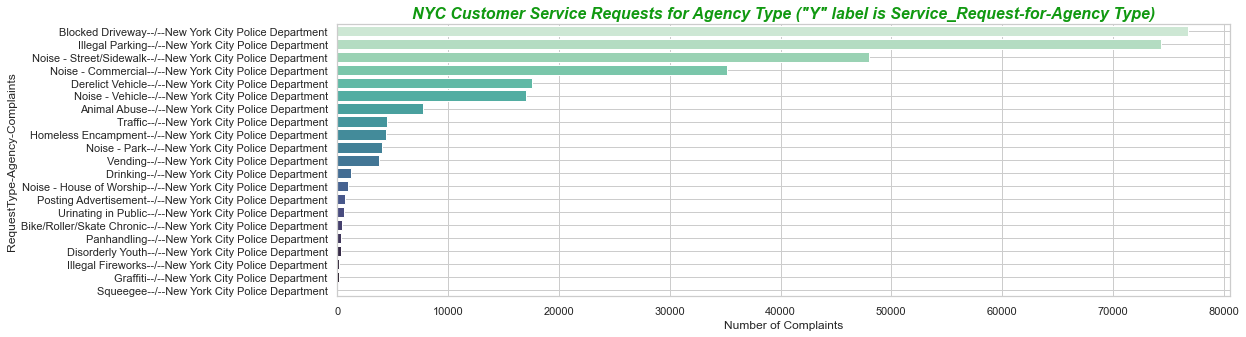

In [48]:
#######################################################################################################
# plot the graph of complaint types and the agency to which requests sent and their count
#######################################################################################################
plt.figure(figsize=(16,5))
NYC_Comp_type_Agency['RequestType-Agency-Complaints'] = NYC_Comp_type_Agency.index.get_level_values(0).astype(str) + '--/--' + \
                   NYC_Comp_type_Agency.index.get_level_values(1).astype(str).str.zfill(2)



sns.barplot(data=NYC_Comp_type_Agency.head(10),y=NYC_Comp_type_Agency['RequestType-Agency-Complaints'],\
            x=NYC_Comp_type_Agency['Number of Complaints'], \
            palette='mako_r',orient='h')
fontdict={'fontsize':16,'fontweight':'bold','color':'#119911','fontstyle':'italic'}
plt.title('NYC Customer Service Requests for Agency Type ("Y" label is Service_Request-for-Agency Type)',fontdict=fontdict)
plt.grid(True)
plt.show()


# Null Hypothsis: Average response time across complaint types is similar
# Alternate Hypothesis: Average response time across complaint types is 
# not similar 

#  Null Hypothisis: Service requested and location related
#  Alternate Hypothisis: Service requested and location not related

In [49]:
#######################################################################################################
# extract the data for above hypothesis testing
#######################################################################################################
NYC311 = NYC[['Agency','Incident Zip','City','Facility Type','Complaint Type','Borough',\
                  'Location Type','Address Type','Community Board','Request_Closing_Time']]

In [50]:
#######################################################################################################
# Look at the top 5 records of the extracted data
#######################################################################################################
NYC311.head()

,Agency,Incident Zip,City,Facility Type,Complaint Type,Borough,Location Type,Address Type,Community Board,Request_Closing_Time
0,NYPD,10034,NEW YORK,Precinct,Noise - Street/Sidewalk,MANHATTAN,Street/Sidewalk,ADDRESS,12 MANHATTAN,0
1,NYPD,11105,ASTORIA,Precinct,Blocked Driveway,QUEENS,Street/Sidewalk,ADDRESS,01 QUEENS,0
2,NYPD,10458,BRONX,Precinct,Blocked Driveway,BRONX,Street/Sidewalk,ADDRESS,07 BRONX,0
3,NYPD,10461,BRONX,Precinct,Illegal Parking,BRONX,Street/Sidewalk,ADDRESS,10 BRONX,0
4,NYPD,11373,ELMHURST,Precinct,Illegal Parking,QUEENS,Street/Sidewalk,ADDRESS,04 QUEENS,0


In [51]:
#######################################################################################################
# Look at the structer of the extracted fields and null value details
#######################################################################################################
NYC311.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298067 entries, 0 to 300697
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Agency                298067 non-null  object
 1   Incident Zip          298067 non-null  int32 
 2   City                  298026 non-null  object
 3   Facility Type         298060 non-null  object
 4   Complaint Type        298067 non-null  object
 5   Borough               298067 non-null  object
 6   Location Type         297946 non-null  object
 7   Address Type          297826 non-null  object
 8   Community Board       298067 non-null  object
 9   Request_Closing_Time  298067 non-null  int64 
dtypes: int32(1), int64(1), object(8)
memory usage: 23.9+ MB


In [52]:
#######################################################################################################
# remove null value rows from the above fieds
#######################################################################################################
NYC311 = NYC311[~NYC311['City'].isna()]
NYC311 = NYC311[~NYC311['Facility Type'].isna()]
NYC311 = NYC311[~NYC311['Location Type'].isna()]
NYC311 = NYC311[~NYC311['Address Type'].isna()]


In [53]:
#######################################################################################################
# Look at the shape of the file after deleting
#######################################################################################################
NYC311.shape

(297660, 10)

In [54]:
#######################################################################################################
# rename the fileds that has spaces in them
#######################################################################################################
NYC311.rename(columns={'Incident Zip':'Incident_Zip'},inplace=True)
NYC311.rename(columns={'Facility Type':'Facility_Type'},inplace=True)
NYC311.rename(columns={'Complaint Type':'Complaint_Type'},inplace=True)
NYC311.rename(columns={'Location Type':'Location_Type'},inplace=True)
NYC311.rename(columns={'Address Type':'Address_Type'},inplace=True)
NYC311.rename(columns={'Community Board':'Community_Board'},inplace=True)

In [55]:
#######################################################################################################
# Load and run the OLS model to view the p-vales, coeffieicnts, r squared and other details
#######################################################################################################


import statsmodels.formula.api as smf
lm = smf.ols('Request_Closing_Time ~ Agency+Incident_Zip+City+Facility_Type+Complaint_Type+Borough+Location_Type+Address_Type+Community_Board', \
             data=NYC311).fit()


In [56]:
#######################################################################################################
# Look at the summary details to reject or accept Hypothesis
#######################################################################################################

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Request_Closing_Time   R-squared:                       0.035
Model:                              OLS   Adj. R-squared:                  0.035
Method:                   Least Squares   F-statistic:                     69.55
Date:                  Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                          16:26:52   Log-Likelihood:                 94438.
No. Observations:                297660   AIC:                        -1.886e+05
Df Residuals:                    297502   BIC:                        -1.869e+05
Df Model:                           157                                         
Covariance Type:              nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       0.0191      0.125      0.153      0.879      -0.226       0.264
City[T.ASTORIA]                                 0.0121      0.039      0.311      0.756      -0.064       0.088
City[T.Astoria]                                 0.0127      0.039      0.322      0.748      -0.065       0.090
City[T.BAYSIDE]                                 0.0382      0.041      0.931      0.352      -0.042       0.119
City[T.BELLEROSE]                               0.0384      0.042      0.916      0.360      -0.044       0.121
City[T.BREEZY POINT]                            0.0014      0.034      0.042      0.967      -0.066       0.069
City[T.BRONX]                                   0.0245      0.076      0.321      0.748      -0.125       0.174
City[T.BROOKLYN]                                0.0020      0.181      0.011      0.991      -0.352       0.356
City[T.CAMBRIA HEIGHTS]                         0.0273      0.042      0.656      0.512      -0.054       0.109
City[T.CENTRAL PARK]                           -0.0087      0.164     -0.053      0.958      -0.331       0.313
City[T.COLLEGE POINT]                           0.0381      0.041      0.933      0.351      -0.042       0.118
City[T.CORONA]                                  0.0120      0.039      0.306      0.759      -0.065       0.089
City[T.EAST ELMHURST]                           0.0095      0.039      0.243      0.808      -0.067       0.086
City[T.ELMHURST]                                0.0105      0.039      0.268      0.789      -0.067       0.088
City[T.East Elmhurst]                           0.0002      0.061      0.004      0.997      -0.119       0.119
City[T.FAR ROCKAWAY]                            0.0019      0.013      0.147      0.883      -0.024       0.027
City[T.FLORAL PARK]                             0.0110      0.044      0.248      0.804      -0.076       0.098
City[T.FLUSHING]                                0.0431      0.041      1.062      0.288      -0.036       0.123
City[T.FOREST HILLS]                            0.0064      0.041      0.157      0.875      -0.074       0.086
City[T.FRESH MEADOWS]                           0.0439      0.041      1.079      0.281      -0.036       0.124
City[T.GLEN OAKS]                              -0.0227      0.043     -0.528      0.598      -0.107       0.062
City[T.HOLLIS]                                  0.0650      0.041      1.593      0.111      -0.015       0.145
City[T.HOWARD BEACH]                            0.0364      0.042      0.859      0.390      -0.047       0.119
City[T.Howard Beach]                           -0.0077      0.181     -0.042      0.966      -0.363       0.348
City[T.JACKSON HEIGHTS]              

In [57]:
#######################################################################################################
# List the fields/categories that the p-values less than .05
#######################################################################################################
lm.pvalues[lm.pvalues<0.05]

Complaint_Type[T.Blocked Driveway]            4.887717e-10
Complaint_Type[T.Derelict Vehicle]            6.160190e-21
Complaint_Type[T.Disorderly Youth]            5.594760e-03
Complaint_Type[T.Drinking]                    4.731022e-03
Complaint_Type[T.Graffiti]                    1.072671e-02
Complaint_Type[T.Homeless Encampment]         3.450671e-05
Complaint_Type[T.Illegal Fireworks]           3.757113e-02
Complaint_Type[T.Illegal Parking]             1.086115e-06
Complaint_Type[T.Noise - Commercial]          1.532259e-03
Complaint_Type[T.Noise - House of Worship]    2.829680e-03
Complaint_Type[T.Noise - Park]                2.628352e-02
Complaint_Type[T.Noise - Street/Sidewalk]     6.343215e-12
Complaint_Type[T.Noise - Vehicle]             1.874467e-13
Complaint_Type[T.Traffic]                     2.253121e-07
Complaint_Type[T.Urinating in Public]         1.073727e-02
Complaint_Type[T.Vending]                     1.237512e-05
Location_Type[T.Highway]                      2.662128e-

# Conclusion: Average response time across complaint types is not similar;
# there are several fields with complaint_type that has 
# P-values less than 0.05. So we can reject null hypothesis,

# Conclusion: Service requested and location are not much related;  
# none of the borough or city fields are in the above 
# list of p-values less than 0.05. So, even here we can reject the null 
# hypothesis.